In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# The path to our CSV files
csv_path_2011 = "../data/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv"
csv_path_2012 = "../data/Medicare_Provider_Charge_Inpatient_DRG100_FY2012.csv"
csv_path_2013 = "../data/Medicare_Provider_Charge_Inpatient_DRG100_FY2013.csv"
csv_path_2014 = "../data/Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv"
csv_path_2015 = "../data/Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv"

population_path = "../data/NST-EST2017-01.csv"
df_pop = pd.read_csv(population_path)

# Read our data into pandas
df_2011 = pd.read_csv(csv_path_2011)
df_2011['year'] = '2011'
df_2012 = pd.read_csv(csv_path_2012)
df_2012['year'] = '2012'
df_2013 = pd.read_csv(csv_path_2013)
df_2013['year'] = '2013'
df_2014 = pd.read_csv(csv_path_2014)
df_2014['year'] = '2014'
df_2015 = pd.read_csv(csv_path_2015)
df_2015['year'] = '2015'

df = pd.concat([df_2011,df_2012,df_2013,df_2014,df_2015])

In [ ]:
# df['Provider State']

In [54]:

# df = df.loc[df['year']=='2011',:]
# test = df_pop[:,'Region']=='South Region'
# test1 = df_pop.loc[test,'2017']
# test1
# df_pop.loc[:,df_pop['2011']]
# df_pop.loc[:,'2017']
# df22

# df_pop.columns
df_pop['USPS']

def LookUpPop(state):
    pop = df_pop[df_pop['USPS']==state]
    return pop['2017']
LookUpPop('IL')

13    12,802,023
Name: 2017, dtype: object

In [55]:
# just to show original DRGs
drg_titles = set(df['DRG Definition'].unique())
# print(len(drg_titles),drg_titles)

In [56]:
#cleaning DRG titles to create 'mod_DRG Definition' series
patterns= [' W/O CC/MCC',' W/O MCC',' W MCC', ' W CC', ' MCC', '/MCC']
df['step1_mod_DRG Definition'] = df['DRG Definition'].replace(patterns, "", regex=True)
# knock off 'xxx - ', always 3 digits + ' - '
df['mod_DRG Definition'] = df['step1_mod_DRG Definition'].apply(lambda x : x[6:])

#].apply(lambda x: bn.nanrankdata(x) * 100 / len(x) - 1))
df.drop(df['step1_mod_DRG Definition'])

test = df.groupby('Provider State')
test2 = test.sum()



#df.loc[:,df['Average Medicare Payments']]/ 
#LookUpPop(x)
# df['Average Medicare Payments per State pop'] = df['Provider State'].apply(lambda x :LookUpPop(x) )
# #/LookUpPop(x)



# df.head()

In [57]:
print(len(df['mod_DRG Definition'].unique()),df['mod_DRG Definition'].unique())

309 ['EXTRACRANIAL PROCEDURES' 'DEGENERATIVE NERVOUS SYSTEM DISORDERS'
 'INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION' 'TRANSIENT ISCHEMIA'
 'CRANIAL & PERIPHERAL NERVE DISORDERS' 'SEIZURES' 'DYSEQUILIBRIUM'
 'PULMONARY EMBOLISM' 'RESPIRATORY INFECTIONS & INFLAMMATIONS'
 'PULMONARY EDEMA & RESPIRATORY FAILURE'
 'CHRONIC OBSTRUCTIVE PULMONARY DISEASE' 'SIMPLE PNEUMONIA & PLEURISY'
 'BRONCHITIS & ASTHMA'
 'RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS'
 'RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT <96 HOURS'
 'MAJOR CARDIOVASC PROCEDURES' 'PERMANENT CARDIAC PACEMAKER IMPLANT'
 'PERC CARDIOVASC PROC W DRUG-ELUTING STENT OR 4+ VESSELS/STENTS'
 'PERC CARDIOVASC PROC W DRUG-ELUTING STENT'
 'PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT'
 'PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT'
 'OTHER VASCULAR PROCEDURES'
 'ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE'
 'CIRCULATORY DISORDERS EXCEPT AMI, W CARD CATH' 'HEART FAILURE & SHOCK'
 'PERIPHERAL VASCULAR DISORDERS' 'AT

In [58]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,year,step1_mod_DRG Definition,mod_DRG Definition,Average Medicare Payments per State pop
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES,AL
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES,AL
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES,AL
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES,AL
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES,AL


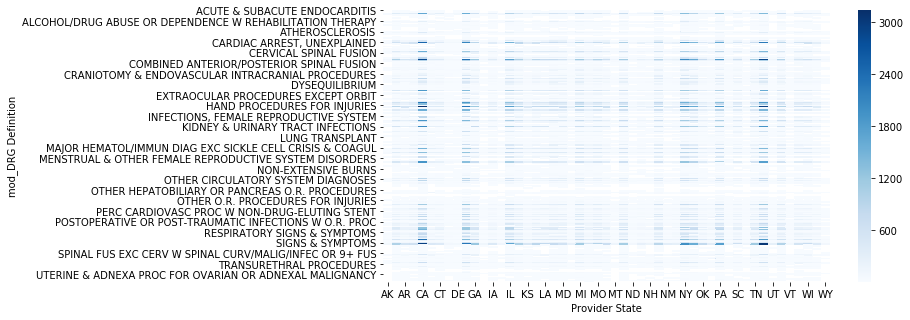

In [59]:
# df.to_csv('../data/data.csv')

drgs = df.groupby(['mod_DRG Definition','Provider State'])
drgs_per_state = drgs['Provider State'].count()
drgs_per_state_table = drgs_per_state.unstack('Provider State')

# drgs_per_state

# drgs_per_state_table

f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(drgs_per_state_table, cmap='Blues');


In [60]:
yeargroup = df.groupby('year')
revised_yeargroup = yeargroup.sum()
reduced_yeargroup = revised_yeargroup.loc[:, ["Total Discharges"]]
reduced_yeargroup.head()

,Total Discharges
year,
2011,6975318
2012,6662965
2013,6517112
2014,7297885
2015,7433268


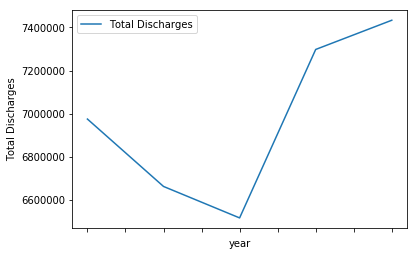

In [61]:
yearly_discharges = reduced_yeargroup.plot(kind='line')

yearly_discharges.set_xlabel("year")
yearly_discharges.set_ylabel("Total Discharges")

plt.show()

In [62]:
yearly_payments = revised_yeargroup.loc[:, ["Average Medicare Payments"]]
yearly_payments = yearly_payments.rename(columns = {"Average Medicare Payments": "Total Medicare Payment"})
yearly_payments.head()

,Total Medicare Payment
year,
2011,1.385155e+09
2012,1.376933e+09
2013,1.359168e+09
2014,2.273489e+09
2015,2.263819e+09


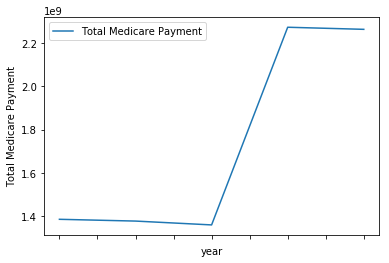

In [63]:
yearly_payments_plot = yearly_payments.plot(kind='line')

yearly_payments_plot.set_xlabel("year")
yearly_payments_plot.set_ylabel("Total Medicare Payment")

plt.show()

#Note: I would like to do medicare payment by region as well as total discharges by region, though this would mean editing our data

In [64]:
stategroup = df.groupby('Provider State')
revised_stategroup = stategroup.sum()
reduced_stategroup = revised_stategroup.loc[:, ["Total Discharges"]]
reduced_stategroup.head()

,Total Discharges
Provider State,
AK,31820
AL,722346
AR,435552
AZ,519429
CA,2390453


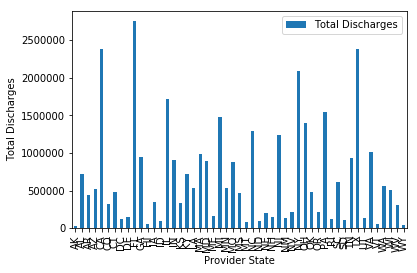

In [65]:
# import matplotlib.pyplot as plt
state_discharges = reduced_stategroup.plot(kind='bar')

state_discharges.set_xlabel("Provider State")
state_discharges.set_ylabel("Total Discharges")

plt.show()

Text(0,0.5,'medicare')

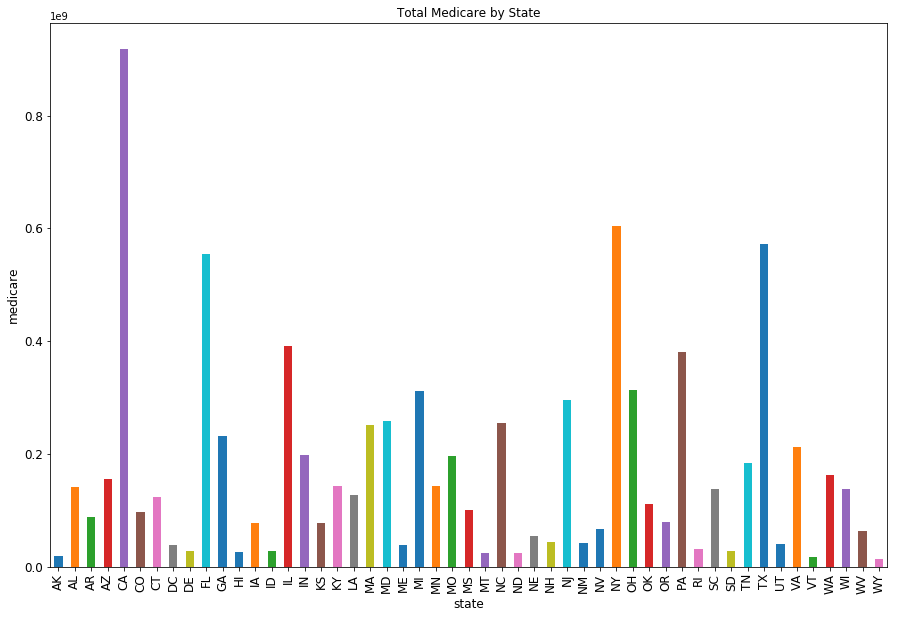

In [66]:
totalmedicarebystate = df.groupby('Provider State')['Average Medicare Payments'].sum()

# totalmedicarebystate.to_csv(‘totalmedicarebystate.csv’)

ax1 = totalmedicarebystate.plot(kind='bar', title ='Total Medicare by State',figsize=(15,10),legend=False, fontsize=12)
ax1.set_xlabel('state',fontsize=12)
ax1.set_ylabel('medicare',fontsize=12)

In [73]:
diagnosesgroup = df.groupby(['Provider State','mod_DRG Definition'])

newdiagnoses = diagnosesgroup['Total Discharges'].sum()
newdiagnoses.sort_values(inplace = True, ascending=[False]) 
countsdictionary = {}
drgdictionary = {}
for state,drg in newdiagnoses.index.values:
   drgdictionary[state] = drg
   countsdictionary[state] = newdiagnoses[state].iloc[0], newdiagnoses[state].index.values[0]
   
newdiagnoses3 = pd.DataFrame.from_dict(countsdictionary,orient='index')    
newdiagnoses4 = pd.DataFrame.from_dict(countsdictionary) 

# newdiagnoses3['Average Medicare Payments per State pop'] = 
# newdiagnoses3.index.values.transform(lambda x :LookUpPop(x) )

for state in newdiagnoses3.index.values:
#     print(LookUpPop(state).iloc[0],state)
    newdiagnoses3[:,'per'] = LookUpPop(state).iloc[0]
    
#newdiagnoses3.loc[state]/


newdiagnoses3.tail()

TypeError: unhashable type: 'slice'

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''